## Demographic Data Analyzer from 1994 Census Data

The data gotten from the 1994 Census were analyzed to answer the questions given in the project assignment. I also used the data set to make some analysis and visualize the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read data from file
df = pd.read_csv('adult.data.csv')

In [3]:
#view data
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We see that the data has 32561 rows and 15 columns(variables) which makes it a large dataset.

### Calculations:

In [5]:
# 1. How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [6]:
 # 2. What is the average age of men?
average_age_men =df[df["sex"] == "Male"]["age"].mean()
average_age_men

39.43354749885268

In [7]:
# 3. What is the percentage of people who have a Bachelor's degree?
num_bachelors = len(df[df["education"] == "Bachelors"])
total_num = len(df)
percentage_bachelors = round(num_bachelors / total_num * 100, 1)
percentage_bachelors

16.4

In [8]:
# 4. What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# 5. What percentage of people without advanced education make more than 50K?

# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df[df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
lower_education = df[~df["education"].isin(["Bachelors", "Masters", "Doctorate"])]

#percentage with salary >50K
non_percentage_higher = len(higher_education[higher_education.salary == ">50K"])
higher_education_rich = round(non_percentage_higher/len(higher_education) * 100, 1)

non_percentage_lower =len(lower_education[lower_education.salary == ">50K"])
lower_education_rich = round(non_percentage_lower / len(lower_education) * 100, 1)

print(higher_education_rich)
print(lower_education_rich)

46.5
17.4


In [9]:
# 6. What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df["hours-per-week"].min()
min_work_hours

1

In [10]:
# 7. What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df[df["hours-per-week"] == min_work_hours]

rich_percentage = round(len(num_min_workers[num_min_workers.salary == ">50K"]) / len(num_min_workers) * 100, 1)
rich_percentage

10.0

In [11]:
# 8. What country has the highest percentage of people that earn >50K?
country_count = df['native-country'].value_counts()
country_rich_count = df[df['salary'] == '>50K']['native-country'].value_counts()
highest_earning_country = (country_rich_count / country_count * 100).idxmax()
highest_earning_country_percentage = round((country_rich_count / country_count * 100).max(), 1)

highest_earning_country_percentage

41.9

In [12]:
# 9. Identify the most popular occupation for those who earn >50K in India.
people_of_india = df[(df["native-country"] == "India") & (df["salary"] == ">50K")]
occupation_counts = people_of_india['occupation'].value_counts()
top_IN_occupation = occupation_counts.idxmax()

top_IN_occupation

'Prof-specialty'

## Data Visualization
For better representation and understanding of the dataset, it can be visualized to show the distribution and the best way to do this is representing the data with a bar chart. The bar chart will show the distribution in percent for the following areas:

* Race
* Gender

## Race

From the first data analysis, we see that there are four named races (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo) and Others whose races were not mentioned or could mean other races. We can look at commonalities among races and answer questions like:

* What is the percentage of each race in the dataset?
* What is the individual percentage of race with higher education and lower education?
* What is the percentage of the individual race that earns>50k and <=50k?
* What is the percentage of the individual races that have higher and lower education and earn >50k or <=50k?

### Number of Race
We found the total number of each race earlier in the quiz and we can break this down in percentage and represent it in a barchart.

In [13]:
#percentage of race
race_count = df['race'].value_counts()/32561 * 100 #32561 is the total number of people in the census dataset
#convert to dataframe
race_count = race_count.to_frame(name='percentage').reset_index()
race_count

,index,percentage
0,White,85.427352
1,Black,9.594300
2,Asian-Pac-Islander,3.190934
3,Amer-Indian-Eskimo,0.955130
4,Other,0.832284


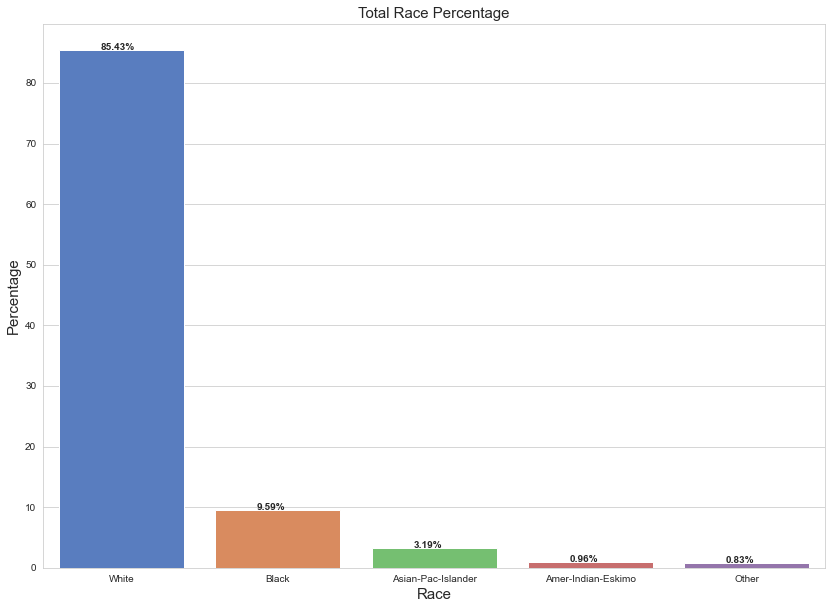

In [14]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='index', y='percentage', data=race_count, ci=None, palette="muted",orient='v')
ax.set_title("Total Race Percentage", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

The bar chart shows that the race with the highest number are White(85.43%) and the rest are minority groups -  Black(9.59%), Asian-Pac-Islander(3.19%), Amer-India_Eskimo(0.96%), and Other(0.83%). Going forward, I will analyze the data using Race as a subset of the data so we don't miss vital information due to the extreme range of values.

### Individual percentage of race with higher and lower education

In [15]:
education = df.groupby('race')['education'].value_counts(normalize=True)*100
education = education.to_frame(name='percentage').reset_index()
education

,race,education,percentage
0,Amer-Indian-Eskimo,HS-grad,38.263666
1,Amer-Indian-Eskimo,Some-college,25.401929
2,Amer-Indian-Eskimo,Bachelors,6.752412
3,Amer-Indian-Eskimo,Assoc-voc,6.109325
4,Amer-Indian-Eskimo,10th,5.144695
...,...,...,...
74,White,Doctorate,1.326575
75,White,12th,1.204343
76,White,5th-6th,1.003020
77,White,1st-4th,0.481737


In [16]:
#separate the data values for higher education
education1 = education.loc[education['education'].isin(["Bachelors", "Masters", "Doctorate"])]
education1

,race,education,percentage
2,Amer-Indian-Eskimo,Bachelors,6.752412
10,Amer-Indian-Eskimo,Masters,1.607717
12,Amer-Indian-Eskimo,Doctorate,0.964630
15,Asian-Pac-Islander,Bachelors,27.815207
18,Asian-Pac-Islander,Masters,8.469682
22,Asian-Pac-Islander,Doctorate,2.694899
33,Black,Bachelors,10.563380
39,Black,Masters,2.752881
45,Black,Doctorate,0.352113
49,Other,Bachelors,12.177122


In [17]:
#assign new column
education1['level'] = "Higher_education"
education1

<ipython-input-17-d5b63f6f47e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education1['level'] = "Higher_education"


,race,education,percentage,level
2,Amer-Indian-Eskimo,Bachelors,6.752412,Higher_education
10,Amer-Indian-Eskimo,Masters,1.607717,Higher_education
12,Amer-Indian-Eskimo,Doctorate,0.964630,Higher_education
15,Asian-Pac-Islander,Bachelors,27.815207,Higher_education
18,Asian-Pac-Islander,Masters,8.469682,Higher_education
22,Asian-Pac-Islander,Doctorate,2.694899,Higher_education
33,Black,Bachelors,10.563380,Higher_education
39,Black,Masters,2.752881,Higher_education
45,Black,Doctorate,0.352113,Higher_education
49,Other,Bachelors,12.177122,Higher_education


In [18]:
#separate the data values for lower education
education2 = education.loc[~education['education'].isin(["Bachelors", "Masters", "Doctorate"])]
education2

,race,education,percentage
0,Amer-Indian-Eskimo,HS-grad,38.263666
1,Amer-Indian-Eskimo,Some-college,25.401929
3,Amer-Indian-Eskimo,Assoc-voc,6.109325
4,Amer-Indian-Eskimo,10th,5.144695
5,Amer-Indian-Eskimo,11th,4.501608
...,...,...,...
73,White,9th,1.448806
75,White,12th,1.204343
76,White,5th-6th,1.003020
77,White,1st-4th,0.481737


In [19]:
#assign new column
education2['level'] = "Lower_education"
education2

<ipython-input-19-8686aca41996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education2['level'] = "Lower_education"


,race,education,percentage,level
0,Amer-Indian-Eskimo,HS-grad,38.263666,Lower_education
1,Amer-Indian-Eskimo,Some-college,25.401929,Lower_education
3,Amer-Indian-Eskimo,Assoc-voc,6.109325,Lower_education
4,Amer-Indian-Eskimo,10th,5.144695,Lower_education
5,Amer-Indian-Eskimo,11th,4.501608,Lower_education
...,...,...,...,...
73,White,9th,1.448806,Lower_education
75,White,12th,1.204343,Lower_education
76,White,5th-6th,1.003020,Lower_education
77,White,1st-4th,0.481737,Lower_education


In [20]:
#merge the dataframe
education_dataset = pd.merge(education1, education2, how='outer')
education_dataset

,race,education,percentage,level
0,Amer-Indian-Eskimo,Bachelors,6.752412,Higher_education
1,Amer-Indian-Eskimo,Masters,1.607717,Higher_education
2,Amer-Indian-Eskimo,Doctorate,0.964630,Higher_education
3,Asian-Pac-Islander,Bachelors,27.815207,Higher_education
4,Asian-Pac-Islander,Masters,8.469682,Higher_education
...,...,...,...,...
74,White,9th,1.448806,Lower_education
75,White,12th,1.204343,Lower_education
76,White,5th-6th,1.003020,Lower_education
77,White,1st-4th,0.481737,Lower_education


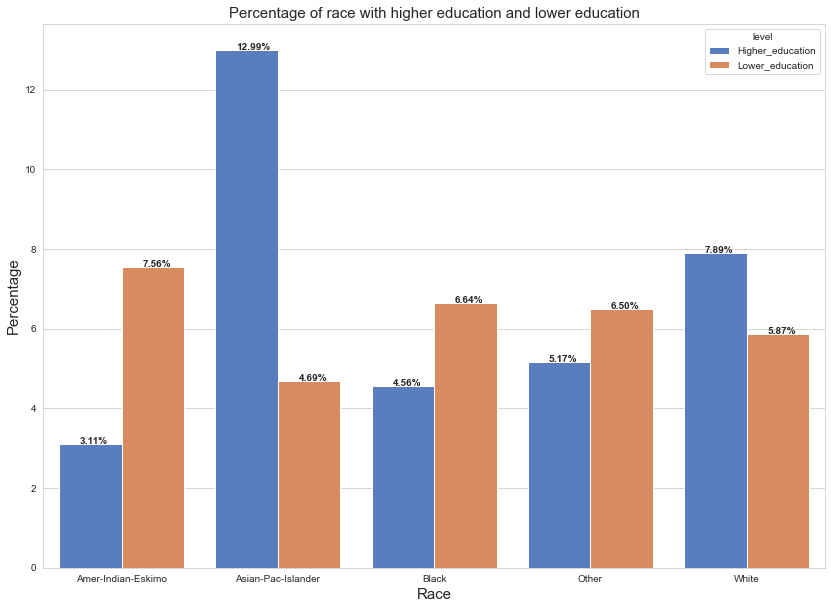

In [21]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=education_dataset, ci=None, palette="muted",orient='v',hue='level' )
ax.set_title("Percentage of race with higher education and lower education", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

### Percentage of the individual race that earns>50k and <=50k

In [22]:
salary = df.groupby('race')['salary'].value_counts(normalize=True)*100
salary = salary.to_frame(name='percentage').reset_index()
salary

,race,salary,percentage
0,Amer-Indian-Eskimo,<=50K,88.424437
1,Amer-Indian-Eskimo,>50K,11.575563
2,Asian-Pac-Islander,<=50K,73.435996
3,Asian-Pac-Islander,>50K,26.564004
4,Black,<=50K,87.612036
5,Black,>50K,12.387964
6,Other,<=50K,90.774908
7,Other,>50K,9.225092
8,White,<=50K,74.414006
9,White,>50K,25.585994


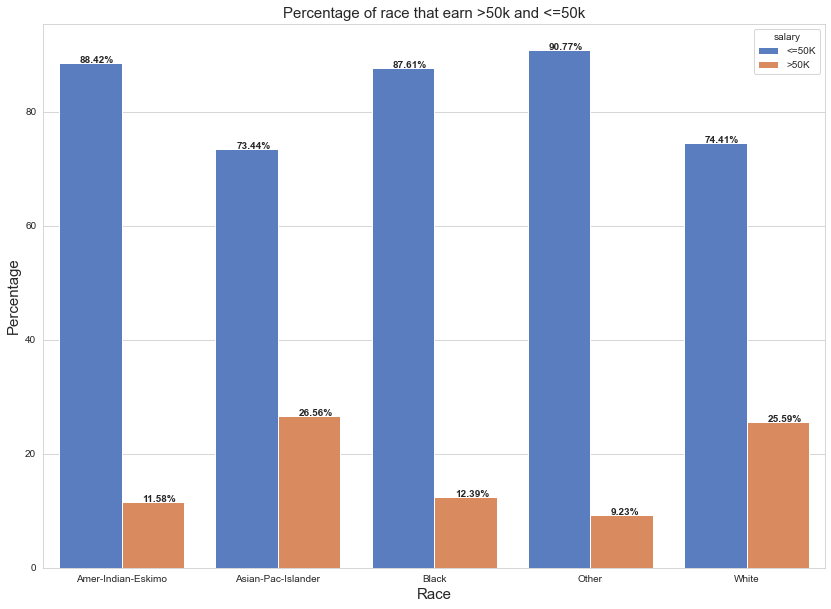

In [23]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=salary, ci=None, palette="muted",orient='v',hue='salary' )
ax.set_title("Percentage of race that earn >50k and <=50k", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

### Percentage of the individual races that have higher and lower education and earn >50k or <=50k

In [24]:
salary_education = df.groupby(['race', 'education'])['salary'].value_counts(normalize=True)*100
salary_education = salary_education.to_frame(name='percentage').reset_index()
salary_education

,race,education,salary,percentage
0,Amer-Indian-Eskimo,10th,<=50K,100.000000
1,Amer-Indian-Eskimo,11th,<=50K,85.714286
2,Amer-Indian-Eskimo,11th,>50K,14.285714
3,Amer-Indian-Eskimo,12th,<=50K,100.000000
4,Amer-Indian-Eskimo,1st-4th,<=50K,100.000000
...,...,...,...,...
132,White,Preschool,<=50K,100.000000
133,White,Prof-school,>50K,74.319066
134,White,Prof-school,<=50K,25.680934
135,White,Some-college,<=50K,79.780893


In [25]:
#separate dataframe for >50k
salary_education1 = salary_education[(salary_education["salary"] == ">50K")]
salary_education1

,race,education,salary,percentage
2,Amer-Indian-Eskimo,11th,>50K,14.285714
9,Amer-Indian-Eskimo,Assoc-acdm,>50K,12.500000
11,Amer-Indian-Eskimo,Assoc-voc,>50K,5.263158
13,Amer-Indian-Eskimo,Bachelors,>50K,38.095238
14,Amer-Indian-Eskimo,Doctorate,>50K,66.666667
17,Amer-Indian-Eskimo,HS-grad,>50K,9.243697
18,Amer-Indian-Eskimo,Masters,>50K,60.000000
20,Amer-Indian-Eskimo,Prof-school,>50K,100.000000
22,Amer-Indian-Eskimo,Some-college,>50K,7.594937
24,Asian-Pac-Islander,10th,>50K,7.692308


In [26]:
#separate higher education from >50k
salary_education11 = salary_education1.loc[salary_education1['education'].isin(["Bachelors", "Masters", "Doctorate"])]
salary_education11

,race,education,salary,percentage
13,Amer-Indian-Eskimo,Bachelors,>50K,38.095238
14,Amer-Indian-Eskimo,Doctorate,>50K,66.666667
18,Amer-Indian-Eskimo,Masters,>50K,60.000000
40,Asian-Pac-Islander,Bachelors,>50K,33.564014
41,Asian-Pac-Islander,Doctorate,>50K,64.285714
46,Asian-Pac-Islander,Masters,>50K,48.863636
70,Black,Bachelors,>50K,29.090909
71,Black,Doctorate,>50K,81.818182
76,Black,Masters,>50K,46.511628
95,Other,Bachelors,>50K,15.151515


In [27]:
#add level
salary_education11['level'] = "Higher_education_>50k"
salary_education11

<ipython-input-27-1c0a50b6fd56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_education11['level'] = "Higher_education_>50k"


,race,education,salary,percentage,level
13,Amer-Indian-Eskimo,Bachelors,>50K,38.095238,Higher_education_>50k
14,Amer-Indian-Eskimo,Doctorate,>50K,66.666667,Higher_education_>50k
18,Amer-Indian-Eskimo,Masters,>50K,60.000000,Higher_education_>50k
40,Asian-Pac-Islander,Bachelors,>50K,33.564014,Higher_education_>50k
41,Asian-Pac-Islander,Doctorate,>50K,64.285714,Higher_education_>50k
46,Asian-Pac-Islander,Masters,>50K,48.863636,Higher_education_>50k
70,Black,Bachelors,>50K,29.090909,Higher_education_>50k
71,Black,Doctorate,>50K,81.818182,Higher_education_>50k
76,Black,Masters,>50K,46.511628,Higher_education_>50k
95,Other,Bachelors,>50K,15.151515,Higher_education_>50k


In [28]:
#separate lower education from >50k
salary_education12 = salary_education1.loc[~salary_education1['education'].isin(["Bachelors", "Masters", "Doctorate"])]
salary_education12

,race,education,salary,percentage
2,Amer-Indian-Eskimo,11th,>50K,14.285714
9,Amer-Indian-Eskimo,Assoc-acdm,>50K,12.500000
11,Amer-Indian-Eskimo,Assoc-voc,>50K,5.263158
17,Amer-Indian-Eskimo,HS-grad,>50K,9.243697
20,Amer-Indian-Eskimo,Prof-school,>50K,100.000000
22,Amer-Indian-Eskimo,Some-college,>50K,7.594937
24,Asian-Pac-Islander,10th,>50K,7.692308
26,Asian-Pac-Islander,11th,>50K,4.761905
28,Asian-Pac-Islander,12th,>50K,11.111111
31,Asian-Pac-Islander,5th-6th,>50K,16.666667


In [29]:
#add level
salary_education12['level'] = "Lower_education_>50k"
salary_education12

<ipython-input-29-811abc457264>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_education12['level'] = "Lower_education_>50k"


,race,education,salary,percentage,level
2,Amer-Indian-Eskimo,11th,>50K,14.285714,Lower_education_>50k
9,Amer-Indian-Eskimo,Assoc-acdm,>50K,12.500000,Lower_education_>50k
11,Amer-Indian-Eskimo,Assoc-voc,>50K,5.263158,Lower_education_>50k
17,Amer-Indian-Eskimo,HS-grad,>50K,9.243697,Lower_education_>50k
20,Amer-Indian-Eskimo,Prof-school,>50K,100.000000,Lower_education_>50k
22,Amer-Indian-Eskimo,Some-college,>50K,7.594937,Lower_education_>50k
24,Asian-Pac-Islander,10th,>50K,7.692308,Lower_education_>50k
26,Asian-Pac-Islander,11th,>50K,4.761905,Lower_education_>50k
28,Asian-Pac-Islander,12th,>50K,11.111111,Lower_education_>50k
31,Asian-Pac-Islander,5th-6th,>50K,16.666667,Lower_education_>50k


In [30]:
#separate the dataframe for <=50k
salary_education2 = salary_education[(salary_education["salary"] == "<=50K")]
salary_education2

,race,education,salary,percentage
0,Amer-Indian-Eskimo,10th,<=50K,100.000000
1,Amer-Indian-Eskimo,11th,<=50K,85.714286
3,Amer-Indian-Eskimo,12th,<=50K,100.000000
4,Amer-Indian-Eskimo,1st-4th,<=50K,100.000000
5,Amer-Indian-Eskimo,5th-6th,<=50K,100.000000
...,...,...,...,...
128,White,HS-grad,<=50K,82.681941
131,White,Masters,<=50K,43.331165
132,White,Preschool,<=50K,100.000000
134,White,Prof-school,<=50K,25.680934


In [31]:
#separate higher education from <=50k
salary_education21 = salary_education2.loc[salary_education2['education'].isin(["Bachelors", "Masters", "Doctorate"])]
salary_education21

,race,education,salary,percentage
12,Amer-Indian-Eskimo,Bachelors,<=50K,61.904762
15,Amer-Indian-Eskimo,Doctorate,<=50K,33.333333
19,Amer-Indian-Eskimo,Masters,<=50K,40.000000
39,Asian-Pac-Islander,Bachelors,<=50K,66.435986
42,Asian-Pac-Islander,Doctorate,<=50K,35.714286
45,Asian-Pac-Islander,Masters,<=50K,51.136364
69,Black,Bachelors,<=50K,70.909091
72,Black,Doctorate,<=50K,18.181818
75,Black,Masters,<=50K,53.488372
94,Other,Bachelors,<=50K,84.848485


In [32]:
#add level
salary_education21['level'] = "Higher_education_<=50k"
salary_education21

<ipython-input-32-159d85c2c7f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_education21['level'] = "Higher_education_<=50k"


,race,education,salary,percentage,level
12,Amer-Indian-Eskimo,Bachelors,<=50K,61.904762,Higher_education_<=50k
15,Amer-Indian-Eskimo,Doctorate,<=50K,33.333333,Higher_education_<=50k
19,Amer-Indian-Eskimo,Masters,<=50K,40.000000,Higher_education_<=50k
39,Asian-Pac-Islander,Bachelors,<=50K,66.435986,Higher_education_<=50k
42,Asian-Pac-Islander,Doctorate,<=50K,35.714286,Higher_education_<=50k
45,Asian-Pac-Islander,Masters,<=50K,51.136364,Higher_education_<=50k
69,Black,Bachelors,<=50K,70.909091,Higher_education_<=50k
72,Black,Doctorate,<=50K,18.181818,Higher_education_<=50k
75,Black,Masters,<=50K,53.488372,Higher_education_<=50k
94,Other,Bachelors,<=50K,84.848485,Higher_education_<=50k


In [33]:
#separate lower education from <=50k
salary_education22 = salary_education2.loc[~salary_education2['education'].isin(["Bachelors", "Masters", "Doctorate"])]
salary_education22

,race,education,salary,percentage
0,Amer-Indian-Eskimo,10th,<=50K,100.000000
1,Amer-Indian-Eskimo,11th,<=50K,85.714286
3,Amer-Indian-Eskimo,12th,<=50K,100.000000
4,Amer-Indian-Eskimo,1st-4th,<=50K,100.000000
5,Amer-Indian-Eskimo,5th-6th,<=50K,100.000000
...,...,...,...,...
122,White,Assoc-voc,<=50K,72.410936
128,White,HS-grad,<=50K,82.681941
132,White,Preschool,<=50K,100.000000
134,White,Prof-school,<=50K,25.680934


In [34]:
#add level
salary_education22['level'] = "Lower_education_<=50k"
salary_education22

<ipython-input-34-5f529097484b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_education22['level'] = "Lower_education_<=50k"


,race,education,salary,percentage,level
0,Amer-Indian-Eskimo,10th,<=50K,100.000000,Lower_education_<=50k
1,Amer-Indian-Eskimo,11th,<=50K,85.714286,Lower_education_<=50k
3,Amer-Indian-Eskimo,12th,<=50K,100.000000,Lower_education_<=50k
4,Amer-Indian-Eskimo,1st-4th,<=50K,100.000000,Lower_education_<=50k
5,Amer-Indian-Eskimo,5th-6th,<=50K,100.000000,Lower_education_<=50k
...,...,...,...,...,...
122,White,Assoc-voc,<=50K,72.410936,Lower_education_<=50k
128,White,HS-grad,<=50K,82.681941,Lower_education_<=50k
132,White,Preschool,<=50K,100.000000,Lower_education_<=50k
134,White,Prof-school,<=50K,25.680934,Lower_education_<=50k


In [35]:
# merge the dataframe
salary_education_dataset1 = pd.merge(salary_education11, salary_education12, how='outer')
salary_education_dataset1

,race,education,salary,percentage,level
0,Amer-Indian-Eskimo,Bachelors,>50K,38.095238,Higher_education_>50k
1,Amer-Indian-Eskimo,Doctorate,>50K,66.666667,Higher_education_>50k
2,Amer-Indian-Eskimo,Masters,>50K,60.000000,Higher_education_>50k
3,Asian-Pac-Islander,Bachelors,>50K,33.564014,Higher_education_>50k
4,Asian-Pac-Islander,Doctorate,>50K,64.285714,Higher_education_>50k
5,Asian-Pac-Islander,Masters,>50K,48.863636,Higher_education_>50k
6,Black,Bachelors,>50K,29.090909,Higher_education_>50k
7,Black,Doctorate,>50K,81.818182,Higher_education_>50k
8,Black,Masters,>50K,46.511628,Higher_education_>50k
9,Other,Bachelors,>50K,15.151515,Higher_education_>50k


In [36]:
salary_education_dataset2 = pd.merge(salary_education21, salary_education22,how='outer')
salary_education_dataset2

,race,education,salary,percentage,level
0,Amer-Indian-Eskimo,Bachelors,<=50K,61.904762,Higher_education_<=50k
1,Amer-Indian-Eskimo,Doctorate,<=50K,33.333333,Higher_education_<=50k
2,Amer-Indian-Eskimo,Masters,<=50K,40.000000,Higher_education_<=50k
3,Asian-Pac-Islander,Bachelors,<=50K,66.435986,Higher_education_<=50k
4,Asian-Pac-Islander,Doctorate,<=50K,35.714286,Higher_education_<=50k
...,...,...,...,...,...
72,White,Assoc-voc,<=50K,72.410936,Lower_education_<=50k
73,White,HS-grad,<=50K,82.681941,Lower_education_<=50k
74,White,Preschool,<=50K,100.000000,Lower_education_<=50k
75,White,Prof-school,<=50K,25.680934,Lower_education_<=50k


In [37]:
#merge the all dataframes
salary_education_dataset = pd.merge(salary_education_dataset1, salary_education_dataset2, how='outer')
salary_education_dataset

,race,education,salary,percentage,level
0,Amer-Indian-Eskimo,Bachelors,>50K,38.095238,Higher_education_>50k
1,Amer-Indian-Eskimo,Doctorate,>50K,66.666667,Higher_education_>50k
2,Amer-Indian-Eskimo,Masters,>50K,60.000000,Higher_education_>50k
3,Asian-Pac-Islander,Bachelors,>50K,33.564014,Higher_education_>50k
4,Asian-Pac-Islander,Doctorate,>50K,64.285714,Higher_education_>50k
...,...,...,...,...,...
132,White,Assoc-voc,<=50K,72.410936,Lower_education_<=50k
133,White,HS-grad,<=50K,82.681941,Lower_education_<=50k
134,White,Preschool,<=50K,100.000000,Lower_education_<=50k
135,White,Prof-school,<=50K,25.680934,Lower_education_<=50k


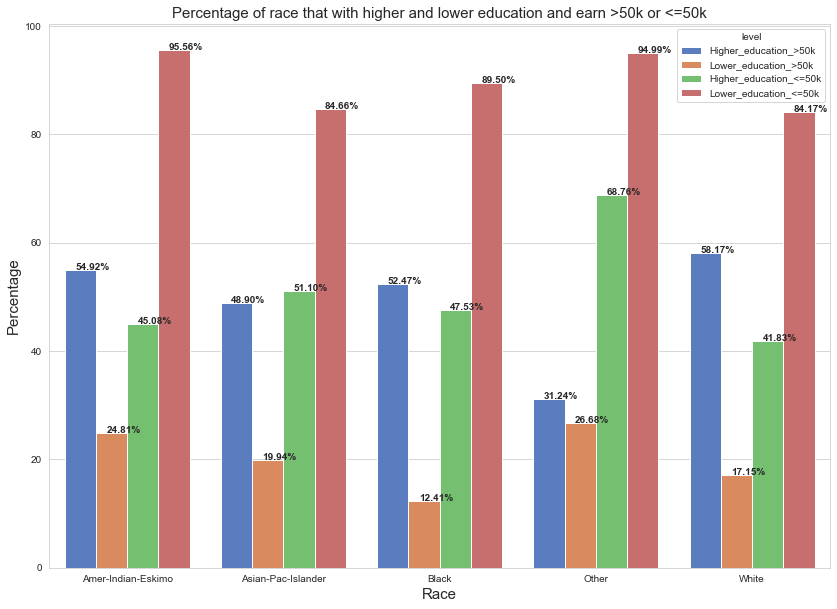

In [38]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=salary_education_dataset, ci=None, palette="muted",orient='v',hue='level' )
ax.set_title("Percentage of race that with higher and lower education and earn >50k or <=50k", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

The bar chart has helped to visually represent the distribution that might not be clear just by looking at it in a data frame or viewing the values. 

### Gender

We can study gender in order to find commonalities and answer questions like:
* What is the percentage of sexes?
* What is the percentage of sexes by race?
* What is the percentage of sexes with higher and lower education by race?
* What is the percentage of sexes that earn >or<=50k by race?
* What is the percentage of sexes with higher and lower education and earn >or<=50k by race?

### Percentage of sexes

In [39]:
#calculate the number of sexes
gender = df['sex'].value_counts(normalize=True)*100
gender = gender.to_frame(name='percentage').reset_index()
gender

,index,percentage
0,Male,66.920549
1,Female,33.079451


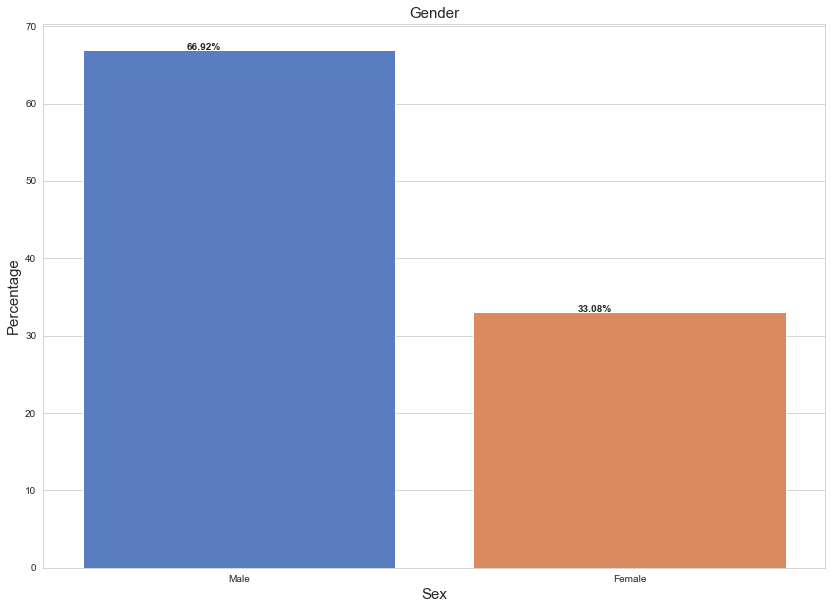

In [40]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='index', y='percentage', data=gender, ci=None, palette="muted",orient='v')
ax.set_title("Gender", fontsize=15)
ax.set_xlabel ("Sex", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

### Percentage of sexes by race

In [41]:
#calculate gender by race, divide by the total number in the dataframe and multiply by 100 to get the percentage
gender_race = df.groupby('sex')['race'].value_counts()/32561 * 100
#convert to dataframe
gender_race = gender_race.to_frame(name='percentage').reset_index()
gender_race

,sex,race,percentage
0,Female,White,26.540954
1,Female,Black,4.775652
2,Female,Asian-Pac-Islander,1.062621
3,Female,Amer-Indian-Eskimo,0.365468
4,Female,Other,0.334756
5,Male,White,58.886398
6,Male,Black,4.818648
7,Male,Asian-Pac-Islander,2.128313
8,Male,Amer-Indian-Eskimo,0.589662
9,Male,Other,0.497528


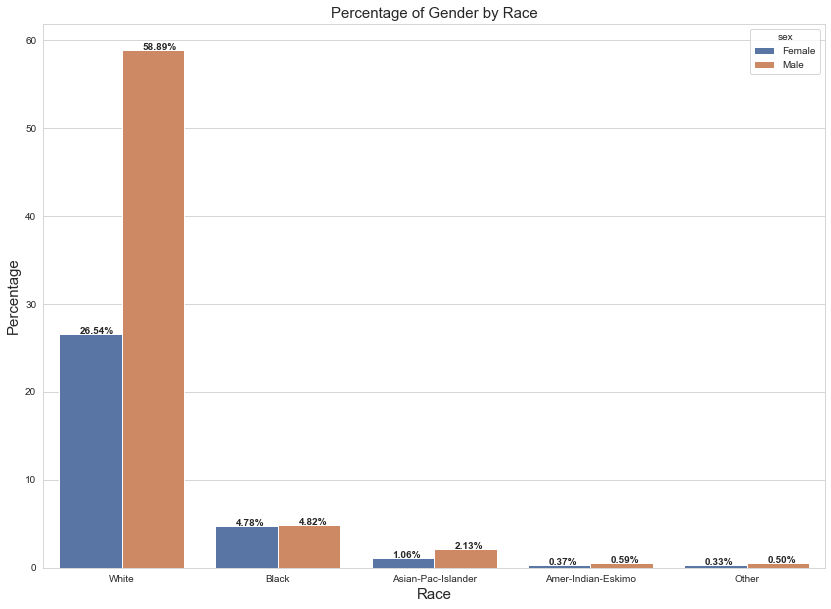

In [42]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=gender_race, ci=None, palette="deep",orient='v', hue='sex')
ax.set_title("Percentage of Gender by Race", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

Just like in race, the disparity is high so we will look at each race population as the factor and not the total population to avoid extreme values and missing actual information in the data.

### Percentage of sexes with higher and lower education by race

In [43]:
#group according to features
gender_race_education = df.groupby(['race', 'education'])['sex'].value_counts(normalize=True)*100
gender_race_education = gender_race_education.to_frame(name='percentage').reset_index()
gender_race_education

,race,education,sex,percentage
0,Amer-Indian-Eskimo,10th,Male,62.500000
1,Amer-Indian-Eskimo,10th,Female,37.500000
2,Amer-Indian-Eskimo,11th,Male,78.571429
3,Amer-Indian-Eskimo,11th,Female,21.428571
4,Amer-Indian-Eskimo,12th,Male,100.000000
...,...,...,...,...
147,White,Preschool,Female,31.578947
148,White,Prof-school,Male,84.630350
149,White,Prof-school,Female,15.369650
150,White,Some-college,Male,63.444498


In [44]:
#separate higher education
gender_race_education1 = gender_race_education.loc[gender_race_education['education'].isin(["Bachelors", "Masters", "Doctorate"])]
gender_race_education1

,race,education,sex,percentage
16,Amer-Indian-Eskimo,Bachelors,Male,61.904762
17,Amer-Indian-Eskimo,Bachelors,Female,38.095238
18,Amer-Indian-Eskimo,Doctorate,Female,66.666667
19,Amer-Indian-Eskimo,Doctorate,Male,33.333333
22,Amer-Indian-Eskimo,Masters,Male,60.000000
23,Amer-Indian-Eskimo,Masters,Female,40.000000
46,Asian-Pac-Islander,Bachelors,Male,65.743945
47,Asian-Pac-Islander,Bachelors,Female,34.256055
48,Asian-Pac-Islander,Doctorate,Male,100.000000
51,Asian-Pac-Islander,Masters,Male,80.681818


In [45]:
#separate female
gender_race_education11 = gender_race_education1.loc[gender_race_education1['sex'].isin(["Female"])]
gender_race_education11

,race,education,sex,percentage
17,Amer-Indian-Eskimo,Bachelors,Female,38.095238
18,Amer-Indian-Eskimo,Doctorate,Female,66.666667
23,Amer-Indian-Eskimo,Masters,Female,40.000000
47,Asian-Pac-Islander,Bachelors,Female,34.256055
52,Asian-Pac-Islander,Masters,Female,19.318182
77,Black,Bachelors,Female,50.000000
80,Black,Doctorate,Female,36.363636
84,Black,Masters,Female,44.186047
110,Other,Bachelors,Female,42.424242
114,Other,Masters,Female,57.142857


In [46]:
#assign new column
gender_race_education11['level'] = "Higher_education_female"
gender_race_education11

<ipython-input-46-ce29b349585c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_education11['level'] = "Higher_education_female"


,race,education,sex,percentage,level
17,Amer-Indian-Eskimo,Bachelors,Female,38.095238,Higher_education_female
18,Amer-Indian-Eskimo,Doctorate,Female,66.666667,Higher_education_female
23,Amer-Indian-Eskimo,Masters,Female,40.000000,Higher_education_female
47,Asian-Pac-Islander,Bachelors,Female,34.256055,Higher_education_female
52,Asian-Pac-Islander,Masters,Female,19.318182,Higher_education_female
77,Black,Bachelors,Female,50.000000,Higher_education_female
80,Black,Doctorate,Female,36.363636,Higher_education_female
84,Black,Masters,Female,44.186047,Higher_education_female
110,Other,Bachelors,Female,42.424242,Higher_education_female
114,Other,Masters,Female,57.142857,Higher_education_female


In [47]:
#separate male
gender_race_education12 = gender_race_education1.loc[gender_race_education1['sex'].isin(["Male"])]
gender_race_education12

,race,education,sex,percentage
16,Amer-Indian-Eskimo,Bachelors,Male,61.904762
19,Amer-Indian-Eskimo,Doctorate,Male,33.333333
22,Amer-Indian-Eskimo,Masters,Male,60.000000
46,Asian-Pac-Islander,Bachelors,Male,65.743945
48,Asian-Pac-Islander,Doctorate,Male,100.000000
51,Asian-Pac-Islander,Masters,Male,80.681818
78,Black,Bachelors,Male,50.000000
79,Black,Doctorate,Male,63.636364
83,Black,Masters,Male,55.813953
109,Other,Bachelors,Male,57.575758


In [48]:
#assign new column
gender_race_education12['level'] = "Higher_education_male"
gender_race_education12

<ipython-input-48-6c0f78911a63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_education12['level'] = "Higher_education_male"


,race,education,sex,percentage,level
16,Amer-Indian-Eskimo,Bachelors,Male,61.904762,Higher_education_male
19,Amer-Indian-Eskimo,Doctorate,Male,33.333333,Higher_education_male
22,Amer-Indian-Eskimo,Masters,Male,60.000000,Higher_education_male
46,Asian-Pac-Islander,Bachelors,Male,65.743945,Higher_education_male
48,Asian-Pac-Islander,Doctorate,Male,100.000000,Higher_education_male
51,Asian-Pac-Islander,Masters,Male,80.681818,Higher_education_male
78,Black,Bachelors,Male,50.000000,Higher_education_male
79,Black,Doctorate,Male,63.636364,Higher_education_male
83,Black,Masters,Male,55.813953,Higher_education_male
109,Other,Bachelors,Male,57.575758,Higher_education_male


In [49]:
#separate lower education
gender_race_education2 = gender_race_education.loc[~gender_race_education['education'].isin(["Bachelors", "Masters", "Doctorate"])]
gender_race_education2

,race,education,sex,percentage
0,Amer-Indian-Eskimo,10th,Male,62.500000
1,Amer-Indian-Eskimo,10th,Female,37.500000
2,Amer-Indian-Eskimo,11th,Male,78.571429
3,Amer-Indian-Eskimo,11th,Female,21.428571
4,Amer-Indian-Eskimo,12th,Male,100.000000
...,...,...,...,...
147,White,Preschool,Female,31.578947
148,White,Prof-school,Male,84.630350
149,White,Prof-school,Female,15.369650
150,White,Some-college,Male,63.444498


In [50]:
#separate female
gender_race_education21 = gender_race_education2.loc[gender_race_education2['sex'].isin(["Female"])]
gender_race_education21

,race,education,sex,percentage
1,Amer-Indian-Eskimo,10th,Female,37.500000
3,Amer-Indian-Eskimo,11th,Female,21.428571
5,Amer-Indian-Eskimo,1st-4th,Female,50.000000
9,Amer-Indian-Eskimo,7th-8th,Female,33.333333
11,Amer-Indian-Eskimo,9th,Female,20.000000
12,Amer-Indian-Eskimo,Assoc-acdm,Female,62.500000
14,Amer-Indian-Eskimo,Assoc-voc,Female,68.421053
21,Amer-Indian-Eskimo,HS-grad,Female,30.252101
24,Amer-Indian-Eskimo,Prof-school,Female,50.000000
27,Amer-Indian-Eskimo,Some-college,Female,46.835443


In [51]:
#assign new column
gender_race_education21['level'] = "Lower_education_female"
gender_race_education21

<ipython-input-51-e16dfa69b609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_education21['level'] = "Lower_education_female"


,race,education,sex,percentage,level
1,Amer-Indian-Eskimo,10th,Female,37.500000,Lower_education_female
3,Amer-Indian-Eskimo,11th,Female,21.428571,Lower_education_female
5,Amer-Indian-Eskimo,1st-4th,Female,50.000000,Lower_education_female
9,Amer-Indian-Eskimo,7th-8th,Female,33.333333,Lower_education_female
11,Amer-Indian-Eskimo,9th,Female,20.000000,Lower_education_female
12,Amer-Indian-Eskimo,Assoc-acdm,Female,62.500000,Lower_education_female
14,Amer-Indian-Eskimo,Assoc-voc,Female,68.421053,Lower_education_female
21,Amer-Indian-Eskimo,HS-grad,Female,30.252101,Lower_education_female
24,Amer-Indian-Eskimo,Prof-school,Female,50.000000,Lower_education_female
27,Amer-Indian-Eskimo,Some-college,Female,46.835443,Lower_education_female


In [52]:
#separate male
gender_race_education22 = gender_race_education2.loc[gender_race_education2['sex'].isin(["Male"])]
gender_race_education22

,race,education,sex,percentage
0,Amer-Indian-Eskimo,10th,Male,62.500000
2,Amer-Indian-Eskimo,11th,Male,78.571429
4,Amer-Indian-Eskimo,12th,Male,100.000000
6,Amer-Indian-Eskimo,1st-4th,Male,50.000000
7,Amer-Indian-Eskimo,5th-6th,Male,100.000000
...,...,...,...,...
136,White,Assoc-voc,Male,66.445733
142,White,HS-grad,Male,69.946092
146,White,Preschool,Male,68.421053
148,White,Prof-school,Male,84.630350


In [53]:
#assign new column
gender_race_education22['level'] = "Lower_education_male"
gender_race_education22

<ipython-input-53-5952259ec34a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_education22['level'] = "Lower_education_male"


,race,education,sex,percentage,level
0,Amer-Indian-Eskimo,10th,Male,62.500000,Lower_education_male
2,Amer-Indian-Eskimo,11th,Male,78.571429,Lower_education_male
4,Amer-Indian-Eskimo,12th,Male,100.000000,Lower_education_male
6,Amer-Indian-Eskimo,1st-4th,Male,50.000000,Lower_education_male
7,Amer-Indian-Eskimo,5th-6th,Male,100.000000,Lower_education_male
...,...,...,...,...,...
136,White,Assoc-voc,Male,66.445733,Lower_education_male
142,White,HS-grad,Male,69.946092,Lower_education_male
146,White,Preschool,Male,68.421053,Lower_education_male
148,White,Prof-school,Male,84.630350,Lower_education_male


In [54]:
#merge higher education
#merge the dataframe
gender_race_education_data1 = pd.merge(gender_race_education11, gender_race_education12, how='outer')
gender_race_education_data1

,race,education,sex,percentage,level
0,Amer-Indian-Eskimo,Bachelors,Female,38.095238,Higher_education_female
1,Amer-Indian-Eskimo,Doctorate,Female,66.666667,Higher_education_female
2,Amer-Indian-Eskimo,Masters,Female,40.000000,Higher_education_female
3,Asian-Pac-Islander,Bachelors,Female,34.256055,Higher_education_female
4,Asian-Pac-Islander,Masters,Female,19.318182,Higher_education_female
5,Black,Bachelors,Female,50.000000,Higher_education_female
6,Black,Doctorate,Female,36.363636,Higher_education_female
7,Black,Masters,Female,44.186047,Higher_education_female
8,Other,Bachelors,Female,42.424242,Higher_education_female
9,Other,Masters,Female,57.142857,Higher_education_female


In [55]:
#merge lower education
#merge the dataframe
gender_race_education_data2 = pd.merge(gender_race_education21, gender_race_education22, how='outer')
gender_race_education_data2

,race,education,sex,percentage,level
0,Amer-Indian-Eskimo,10th,Female,37.500000,Lower_education_female
1,Amer-Indian-Eskimo,11th,Female,21.428571,Lower_education_female
2,Amer-Indian-Eskimo,1st-4th,Female,50.000000,Lower_education_female
3,Amer-Indian-Eskimo,7th-8th,Female,33.333333,Lower_education_female
4,Amer-Indian-Eskimo,9th,Female,20.000000,Lower_education_female
...,...,...,...,...,...
119,White,Assoc-voc,Male,66.445733,Lower_education_male
120,White,HS-grad,Male,69.946092,Lower_education_male
121,White,Preschool,Male,68.421053,Lower_education_male
122,White,Prof-school,Male,84.630350,Lower_education_male


In [56]:
#merge all
#merge the dataframe
gender_race_education_data = pd.merge(gender_race_education_data1, gender_race_education_data2, how='outer')
gender_race_education_data

,race,education,sex,percentage,level
0,Amer-Indian-Eskimo,Bachelors,Female,38.095238,Higher_education_female
1,Amer-Indian-Eskimo,Doctorate,Female,66.666667,Higher_education_female
2,Amer-Indian-Eskimo,Masters,Female,40.000000,Higher_education_female
3,Asian-Pac-Islander,Bachelors,Female,34.256055,Higher_education_female
4,Asian-Pac-Islander,Masters,Female,19.318182,Higher_education_female
...,...,...,...,...,...
147,White,Assoc-voc,Male,66.445733,Lower_education_male
148,White,HS-grad,Male,69.946092,Lower_education_male
149,White,Preschool,Male,68.421053,Lower_education_male
150,White,Prof-school,Male,84.630350,Lower_education_male


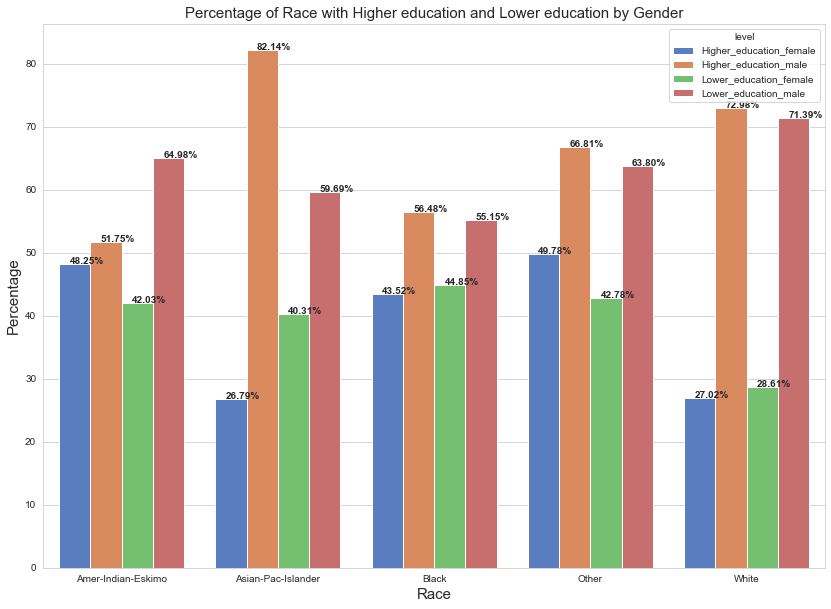

In [57]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=gender_race_education_data, ci=None, palette="muted",orient='v',hue='level' )
ax.set_title("Percentage of Race with Higher education and Lower education by Gender", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

### Percentage of sexes that earn >50k or<=50k by race?

In [58]:
#group according to features
gender_race_salary = df.groupby(['race', 'salary'])['sex'].value_counts(normalize=True)*100
gender_race_salary = gender_race_salary.to_frame(name='percentage').reset_index()
gender_race_salary

,race,salary,sex,percentage
0,Amer-Indian-Eskimo,<=50K,Male,61.090909
1,Amer-Indian-Eskimo,<=50K,Female,38.909091
2,Amer-Indian-Eskimo,>50K,Male,66.666667
3,Amer-Indian-Eskimo,>50K,Female,33.333333
4,Asian-Pac-Islander,<=50K,Male,60.288336
5,Asian-Pac-Islander,<=50K,Female,39.711664
6,Asian-Pac-Islander,>50K,Male,84.420290
7,Asian-Pac-Islander,>50K,Female,15.579710
8,Black,<=50K,Female,53.525758
9,Black,<=50K,Male,46.474242


In [59]:
#separate dataframe for >50k
gender_race_salary1 = gender_race_salary[(gender_race_salary["salary"] == ">50K")]
gender_race_salary1

,race,salary,sex,percentage
2,Amer-Indian-Eskimo,>50K,Male,66.666667
3,Amer-Indian-Eskimo,>50K,Female,33.333333
6,Asian-Pac-Islander,>50K,Male,84.420290
7,Asian-Pac-Islander,>50K,Female,15.579710
10,Black,>50K,Male,76.744186
11,Black,>50K,Female,23.255814
14,Other,>50K,Male,76.000000
15,Other,>50K,Female,24.000000
18,White,>50K,Male,85.555712
19,White,>50K,Female,14.444288


In [60]:
#separate female
gender_race_salary11 = gender_race_salary1.loc[gender_race_salary1['sex'].isin(["Female"])]
gender_race_salary11

,race,salary,sex,percentage
3,Amer-Indian-Eskimo,>50K,Female,33.333333
7,Asian-Pac-Islander,>50K,Female,15.579710
11,Black,>50K,Female,23.255814
15,Other,>50K,Female,24.000000
19,White,>50K,Female,14.444288


In [61]:
#assign new column
gender_race_salary11['level'] = ">50k_female"
gender_race_salary11

<ipython-input-61-5451e3d199c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_salary11['level'] = ">50k_female"


,race,salary,sex,percentage,level
3,Amer-Indian-Eskimo,>50K,Female,33.333333,>50k_female
7,Asian-Pac-Islander,>50K,Female,15.579710,>50k_female
11,Black,>50K,Female,23.255814,>50k_female
15,Other,>50K,Female,24.000000,>50k_female
19,White,>50K,Female,14.444288,>50k_female


In [62]:
#separate male
gender_race_salary12 = gender_race_salary1.loc[gender_race_salary1['sex'].isin(["Male"])]
gender_race_salary12

,race,salary,sex,percentage
2,Amer-Indian-Eskimo,>50K,Male,66.666667
6,Asian-Pac-Islander,>50K,Male,84.420290
10,Black,>50K,Male,76.744186
14,Other,>50K,Male,76.000000
18,White,>50K,Male,85.555712


In [63]:
#assign new column
gender_race_salary12['level'] = ">50k_male"
gender_race_salary12

<ipython-input-63-70f21a4e2419>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_salary12['level'] = ">50k_male"


,race,salary,sex,percentage,level
2,Amer-Indian-Eskimo,>50K,Male,66.666667,>50k_male
6,Asian-Pac-Islander,>50K,Male,84.420290,>50k_male
10,Black,>50K,Male,76.744186,>50k_male
14,Other,>50K,Male,76.000000,>50k_male
18,White,>50K,Male,85.555712,>50k_male


In [64]:
#separate dataframe for <=50k
gender_race_salary2 = gender_race_salary[(gender_race_salary["salary"] == "<=50K")]
gender_race_salary2

,race,salary,sex,percentage
0,Amer-Indian-Eskimo,<=50K,Male,61.090909
1,Amer-Indian-Eskimo,<=50K,Female,38.909091
4,Asian-Pac-Islander,<=50K,Male,60.288336
5,Asian-Pac-Islander,<=50K,Female,39.711664
8,Black,<=50K,Female,53.525758
9,Black,<=50K,Male,46.474242
12,Other,<=50K,Male,58.130081
13,Other,<=50K,Female,41.869919
16,White,<=50K,Male,63.215614
17,White,<=50K,Female,36.784386


In [65]:
#separate female
gender_race_salary21 = gender_race_salary2.loc[gender_race_salary2['sex'].isin(["Female"])]
gender_race_salary21

,race,salary,sex,percentage
1,Amer-Indian-Eskimo,<=50K,Female,38.909091
5,Asian-Pac-Islander,<=50K,Female,39.711664
8,Black,<=50K,Female,53.525758
13,Other,<=50K,Female,41.869919
17,White,<=50K,Female,36.784386


In [66]:
#assign new column
gender_race_salary21['level'] = "<=50k_female"
gender_race_salary21

<ipython-input-66-2c6e197af5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_salary21['level'] = "<=50k_female"


,race,salary,sex,percentage,level
1,Amer-Indian-Eskimo,<=50K,Female,38.909091,<=50k_female
5,Asian-Pac-Islander,<=50K,Female,39.711664,<=50k_female
8,Black,<=50K,Female,53.525758,<=50k_female
13,Other,<=50K,Female,41.869919,<=50k_female
17,White,<=50K,Female,36.784386,<=50k_female


In [67]:
#separate male
gender_race_salary22 = gender_race_salary2.loc[gender_race_salary2['sex'].isin(["Male"])]
gender_race_salary22

,race,salary,sex,percentage
0,Amer-Indian-Eskimo,<=50K,Male,61.090909
4,Asian-Pac-Islander,<=50K,Male,60.288336
9,Black,<=50K,Male,46.474242
12,Other,<=50K,Male,58.130081
16,White,<=50K,Male,63.215614


In [68]:
#assign new column
gender_race_salary22['level'] = "<=50k_male"
gender_race_salary22

<ipython-input-68-6babbca04f23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_race_salary22['level'] = "<=50k_male"


,race,salary,sex,percentage,level
0,Amer-Indian-Eskimo,<=50K,Male,61.090909,<=50k_male
4,Asian-Pac-Islander,<=50K,Male,60.288336,<=50k_male
9,Black,<=50K,Male,46.474242,<=50k_male
12,Other,<=50K,Male,58.130081,<=50k_male
16,White,<=50K,Male,63.215614,<=50k_male


In [69]:
#merge >50k
gender_race_salary_data1 = pd.merge(gender_race_salary11, gender_race_salary12, how='outer')
gender_race_salary_data1

,race,salary,sex,percentage,level
0,Amer-Indian-Eskimo,>50K,Female,33.333333,>50k_female
1,Asian-Pac-Islander,>50K,Female,15.579710,>50k_female
2,Black,>50K,Female,23.255814,>50k_female
3,Other,>50K,Female,24.000000,>50k_female
4,White,>50K,Female,14.444288,>50k_female
5,Amer-Indian-Eskimo,>50K,Male,66.666667,>50k_male
6,Asian-Pac-Islander,>50K,Male,84.420290,>50k_male
7,Black,>50K,Male,76.744186,>50k_male
8,Other,>50K,Male,76.000000,>50k_male
9,White,>50K,Male,85.555712,>50k_male


In [70]:
#merge <=50k
gender_race_salary_data2 = pd.merge(gender_race_salary21, gender_race_salary22, how='outer')
gender_race_salary_data2

,race,salary,sex,percentage,level
0,Amer-Indian-Eskimo,<=50K,Female,38.909091,<=50k_female
1,Asian-Pac-Islander,<=50K,Female,39.711664,<=50k_female
2,Black,<=50K,Female,53.525758,<=50k_female
3,Other,<=50K,Female,41.869919,<=50k_female
4,White,<=50K,Female,36.784386,<=50k_female
5,Amer-Indian-Eskimo,<=50K,Male,61.090909,<=50k_male
6,Asian-Pac-Islander,<=50K,Male,60.288336,<=50k_male
7,Black,<=50K,Male,46.474242,<=50k_male
8,Other,<=50K,Male,58.130081,<=50k_male
9,White,<=50K,Male,63.215614,<=50k_male


In [71]:
#merge all
gender_race_salary_data = pd.merge(gender_race_salary_data1, gender_race_salary_data2, how='outer')
gender_race_salary_data

,race,salary,sex,percentage,level
0,Amer-Indian-Eskimo,>50K,Female,33.333333,>50k_female
1,Asian-Pac-Islander,>50K,Female,15.579710,>50k_female
2,Black,>50K,Female,23.255814,>50k_female
3,Other,>50K,Female,24.000000,>50k_female
4,White,>50K,Female,14.444288,>50k_female
5,Amer-Indian-Eskimo,>50K,Male,66.666667,>50k_male
6,Asian-Pac-Islander,>50K,Male,84.420290,>50k_male
7,Black,>50K,Male,76.744186,>50k_male
8,Other,>50K,Male,76.000000,>50k_male
9,White,>50K,Male,85.555712,>50k_male


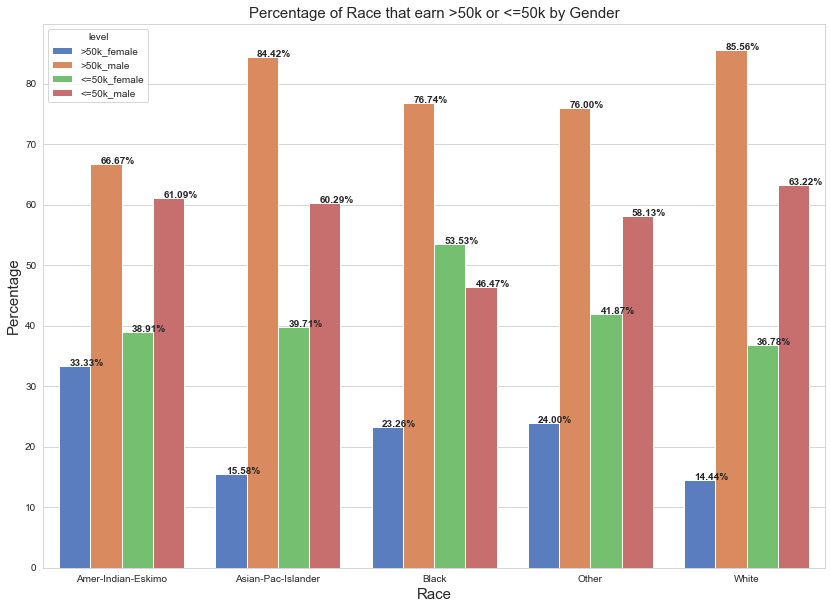

In [72]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x='race', y='percentage', data=gender_race_salary_data, ci=None, palette="muted",orient='v',hue='level' )
ax.set_title("Percentage of Race that earn >50k or <=50k by Gender", fontsize=15)
ax.set_xlabel ("Race", fontsize=15)
ax.set_ylabel ("Percentage", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

If you reached the end, you rock!!! The data analysis was exhilarating to put together, but it was worth it to see how we can answer questions through visualization of the data set. Other parameters in the data like Native Country and Occupation would be nice to look at, but for this, I focused on education and salary.

Now since this was a form of data storytelling, I can form a case study from this called: **Defining Gender and Race inequality using the 1994 census dataset.** (I mean...!)
